In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('AFE.csv')
df.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [69]:
#First let's drop unnecessary columns and rename others something better
df = df.drop(['RA_Report #', 'RA_CAERS Created Date', 'PRI_FDA Industry Code', 'AEC_One Row Outcomes'], axis= 1)
df.columns = ['Date', 'Role', 'Name_of_Food', 'Type_of_Food', 'Age_of_Victim', 'Age_unit', 'Gender', 'Symptoms']
df.head()

,Date,Role,Name_of_Food,Type_of_Food,Age_of_Victim,Age_unit,Gender,Symptoms
0,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,Ice Cream Prod,NaN,Not Available,Female,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,Baby Food Prod,3.0,Month(s),Not Available,"GASTROINTESTINAL DISORDER, VOMITING"
4,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,Baby Food Prod,NaN,Not Available,Not Available,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


Lets also comebine the Age of the victim and the age unit so that we can have less columns to deal with

In [70]:
df['Age_unit'].value_counts()

Year(s)          51331
Not Available    37873
Month(s)          1253
Week(s)            174
Day(s)             147
Decade(s)            8
Name: Age_unit, dtype: int64

In [71]:
len(df[(df['Age_unit'] == 'Week(s)') & (df['Age_of_Victim'] > 13)])

47

In [72]:
df[df['Age_unit'] == 'Week(s)'].nlargest(3, 'Age_of_Victim')

,Date,Role,Name_of_Food,Type_of_Food,Age_of_Victim,Age_unit,Gender,Symptoms
58210,10/29/2014,Suspect,PURITAN'S PRIDE VITAMIN E 400IU RAPID RELEASE ...,Vit/Min/Prot/Unconv Diet(Human/Animal),88.0,Week(s),Female,"BLOOD DISORDER, BLOOD SODIUM DECREASED"
41639,1/15/2013,Suspect,TRIVEREX TRIPLE ACTION COMPLEX,Vit/Min/Prot/Unconv Diet(Human/Animal),77.0,Week(s),Male,"HEART RATE DECREASED, HYPOAESTHESIA"
82313,NaN,Suspect,NATUREMADE FISH OIL 1200 MG (DIETARY SUPPLEMEN...,Vit/Min/Prot/Unconv Diet(Human/Animal),64.0,Week(s),Female,"DYSPHAGIA, DISCOMFORT, GASTROOESOPHAGEAL REFLU..."


There are even some week values which are longer than a year

In [73]:
df[df['Age_unit'] == 'Month(s)'].nlargest(3, 'Age_of_Victim')

,Date,Role,Name_of_Food,Type_of_Food,Age_of_Victim,Age_unit,Gender,Symptoms
15761,1/1/2009,Suspect,DEAD SEA PREMIERE EYE CREAM,Cosmetics,736.0,Month(s),Female,"EYE IRRITATION, SKIN IRRITATION"
15762,1/1/2009,Suspect,DEAD SEA PREMIERE EYE SERUM,Cosmetics,736.0,Month(s),Female,"EYE IRRITATION, SKIN IRRITATION"
15763,1/1/2009,Suspect,DEAD SEA PREMIERE INTENSIVE AGE SERUM,Cosmetics,736.0,Month(s),Female,"EYE IRRITATION, SKIN IRRITATION"


In [74]:
len(df[(df['Age_unit'] == 'Day(s)') & (df['Age_of_Victim'] > 90)])

5

In [75]:
len(df[(df['Age_unit'] == 'Month(s)') & (df['Age_of_Victim'] > 12)])

341

It seems that we have some age units of which show up in weeks and days but can still end up being greater than the definition of a newborn which is 3 months, we'll take this into account

In [76]:
def ages(x, y):
    if 'Not' in y:
        return None
    elif ('Day' in y and x <= 90) or ('Week' in y and x <= 13) or ('Month' in y and x < 4):
        return 'Newborn'
    elif ('Month' in y and x <= 12) or ('Week' in y and x < 52) or 'Day' in y:
        return 'Infant'
    elif ('Year' in y and x < 6) or ('Month' in y and x <= 60) or 'Week' in y:
        return 'Toddler'
    elif('Year' in y and x < 14) or ('Month' in y and x <= 13*12):
        return 'Kid'
    elif('Year' in y and x < 50) or ('Month' in y and x < 50*12):
        return 'Adult'
    else:
        return 'Senior'
df['Age_range'] = np.vectorize(ages)(df['Age_of_Victim'], df['Age_unit'])
df = df.drop(['Age_of_Victim', 'Age_unit'], axis = 1)

In [77]:
df.head()

,Date,Role,Name_of_Food,Type_of_Food,Gender,Symptoms,Age_range
0,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,Female,"SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",Toddler
1,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,Female,"SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...",Toddler
2,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,Ice Cream Prod,Female,"NAUSEA, DYSGEUSIA, DIARRHOEA",None
3,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,Baby Food Prod,Not Available,"GASTROINTESTINAL DISORDER, VOMITING",Newborn
4,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,Baby Food Prod,Not Available,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION",None


Now lets find the most prevalent symptoms and see which ones may be helpful to include

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90786 entries, 0 to 90785
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          53653 non-null  object
 1   Role          90786 non-null  object
 2   Name_of_Food  90786 non-null  object
 3   Type_of_Food  90786 non-null  object
 4   Gender        90786 non-null  object
 5   Symptoms      90781 non-null  object
 6   Age_range     90786 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


In [79]:
symptoms = {}
def finder(symps):
    arr = symps.split(', ')
    for s in arr:
        if symptoms.__contains__(s):
            symptoms[s] += 1
        else:
            symptoms[s] = 0
df['Symptoms'].dropna().apply(finder)
sym = pd.DataFrame([symptoms.keys(), symptoms.values()]).transpose()
sym.columns = ['Symptoms', 'Amount']
sym.head()

,Symptoms,Amount
0,SWELLING FACE,945
1,RASH,3338
2,WHEEZING,374
3,COUGH,1403
4,HOSPITALISATION,616


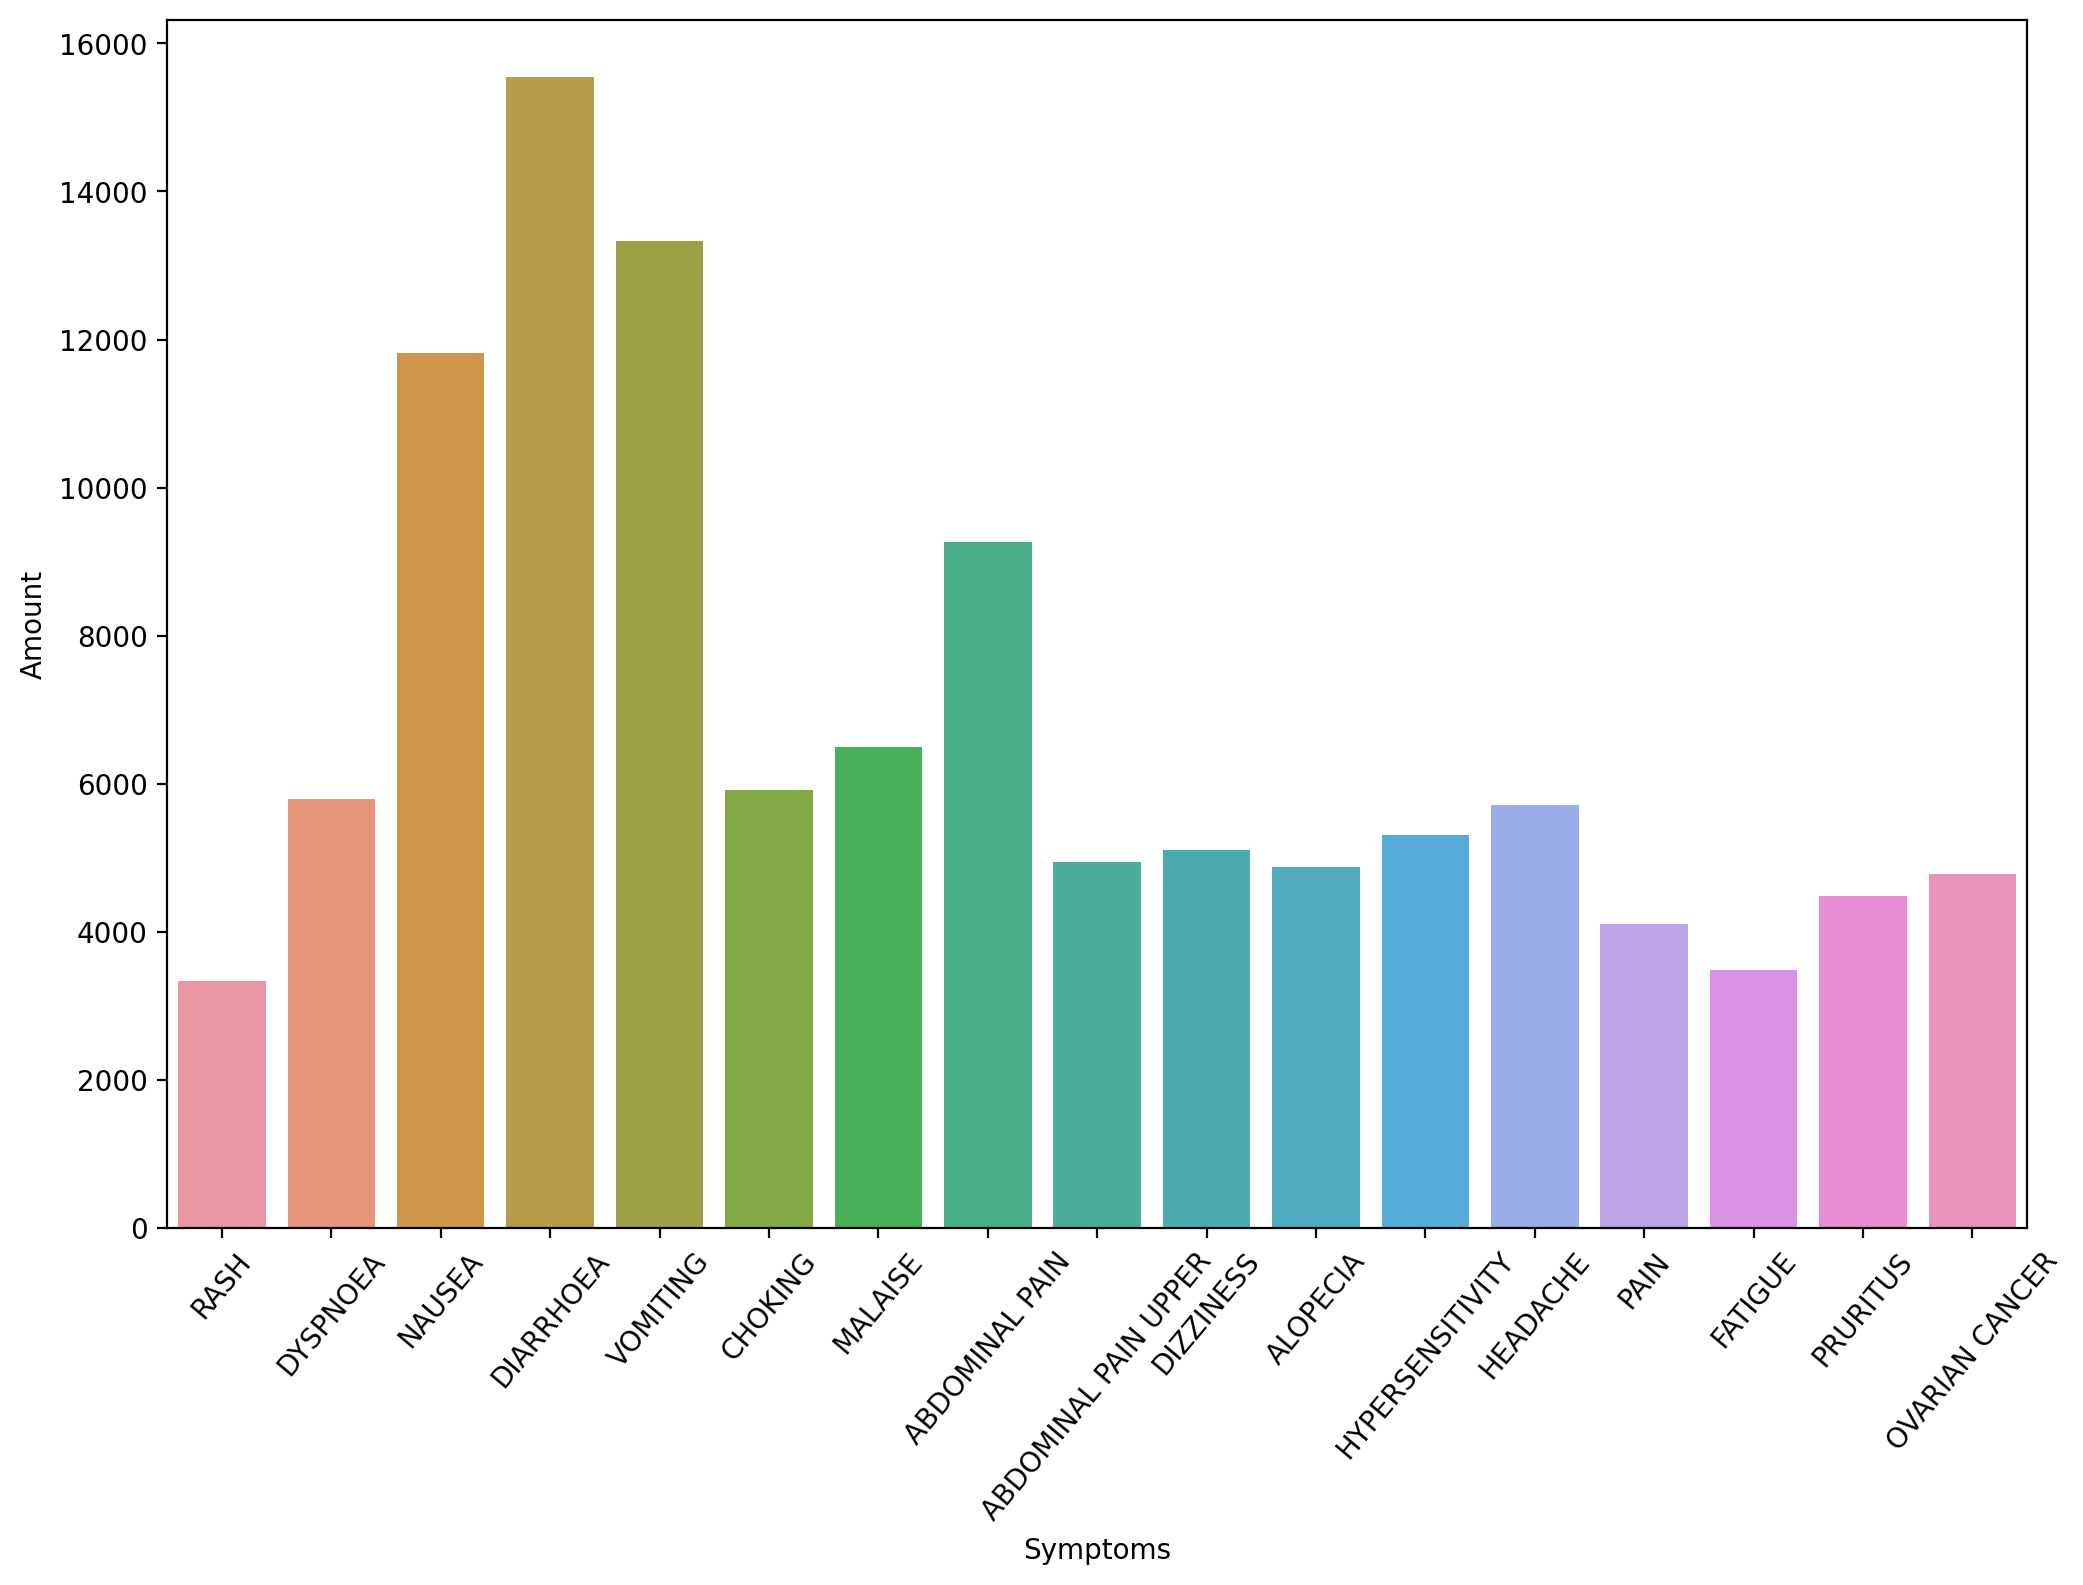

In [80]:
plt.figure(figsize = (12, 8), dpi = 200);
sns.barplot(data=sym[sym['Amount'] > sym['Amount'].quantile(0.996)], x = 'Symptoms', y = 'Amount')
plt.xticks(rotation = 50);

When looking at these symptoms, most of the top ones are fairly obvious and are the results you would recieve when searching up the effects of food poisoning.

There are some unexpeted results, however. One of the main ones is Ovarian Cancer which is usually not caused by foods but as google shows: diets high in whole milk, trans fat, and fried foods can present an increased risk in ovarian cancer.

Alopecia (loss of hair) is another unexpected one. It seems that foods high in dairy, sugar, grease, are carbonated, or have alcohol can cause increased hair loss. However, alopecia is mainly genetic and foods can end up increasing the effect of it.

The last is dysnopea (difficulty in breathing). This is usually caused because a person eats something that they are allergic to.

Let's actually explore these unexpected results and see if the foods eaten match with the google search of foods that can cause these effects.

In [81]:
def unexpected(sent, word): 
    ls = sent.split(', ')
    #print(ls)
    if word in ls:
        return 1
    return 0

t = pd.DataFrame(df[['Name_of_Food','Type_of_Food', 'Symptoms', 'Date']]).dropna(subset = ['Name_of_Food','Type_of_Food', 'Symptoms'])
t['Ovarian Cancer'] = np.vectorize(unexpected)(t['Symptoms'], 'OVARIAN CANCER')
t['Alopecia'] = np.vectorize(unexpected)(t['Symptoms'], 'ALOPECIA')
t['Dysnopea'] = np.vectorize(unexpected)(t['Symptoms'], 'DYSPNOEA')
t['Hospital'] = np.vectorize(unexpected)(t['Symptoms'], 'HOSPITALISATION')
t.head()

,Name_of_Food,Type_of_Food,Symptoms,Date,Ovarian Cancer,Alopecia,Dysnopea,Hospital
0,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,"SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",8/4/2003,0,0,1,1
1,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,"SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...",8/4/2003,0,0,1,1
2,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,Ice Cream Prod,"NAUSEA, DYSGEUSIA, DIARRHOEA",NaN,0,0,0,0
3,ENFAMIL LIPIL BABY FORMULA,Baby Food Prod,"GASTROINTESTINAL DISORDER, VOMITING",11/24/2003,0,0,0,0
4,ENFIMIL LIPIL BABY FORMULA,Baby Food Prod,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION",NaN,0,0,0,0


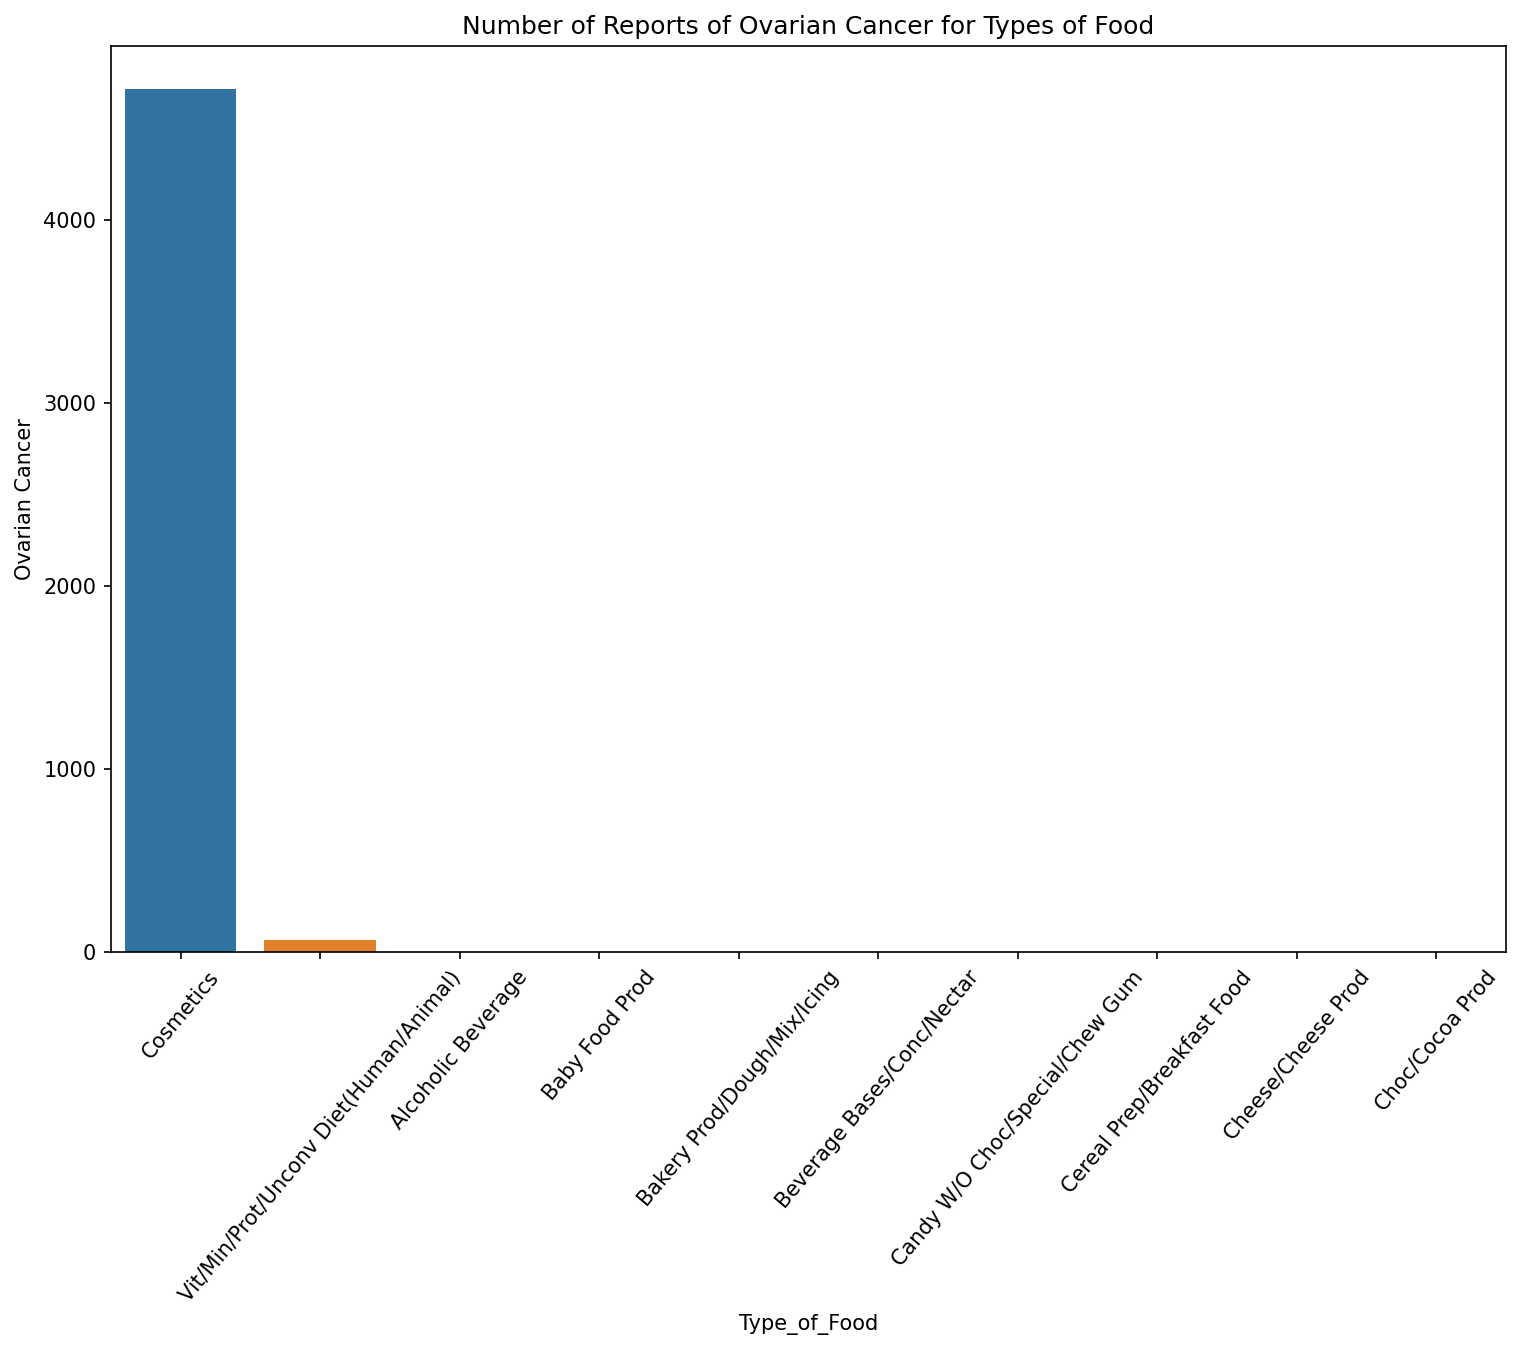

In [82]:
groups = t.groupby('Type_of_Food').sum().reset_index()
plt.figure(figsize = (12, 8), dpi = 150);
sns.barplot(data = groups.nlargest(10 ,'Ovarian Cancer'), x = 'Type_of_Food', y = 'Ovarian Cancer')
plt.xticks(rotation = 50);
plt.title('Number of Reports of Ovarian Cancer for Types of Food');

Okay so obviously from this graph an extremely high amount of Ovarian Cancer reports come from Cosmetic type of foods. Let's take a closer look at which types of cosmetic foods are being reported as causing Ovarian Cancer

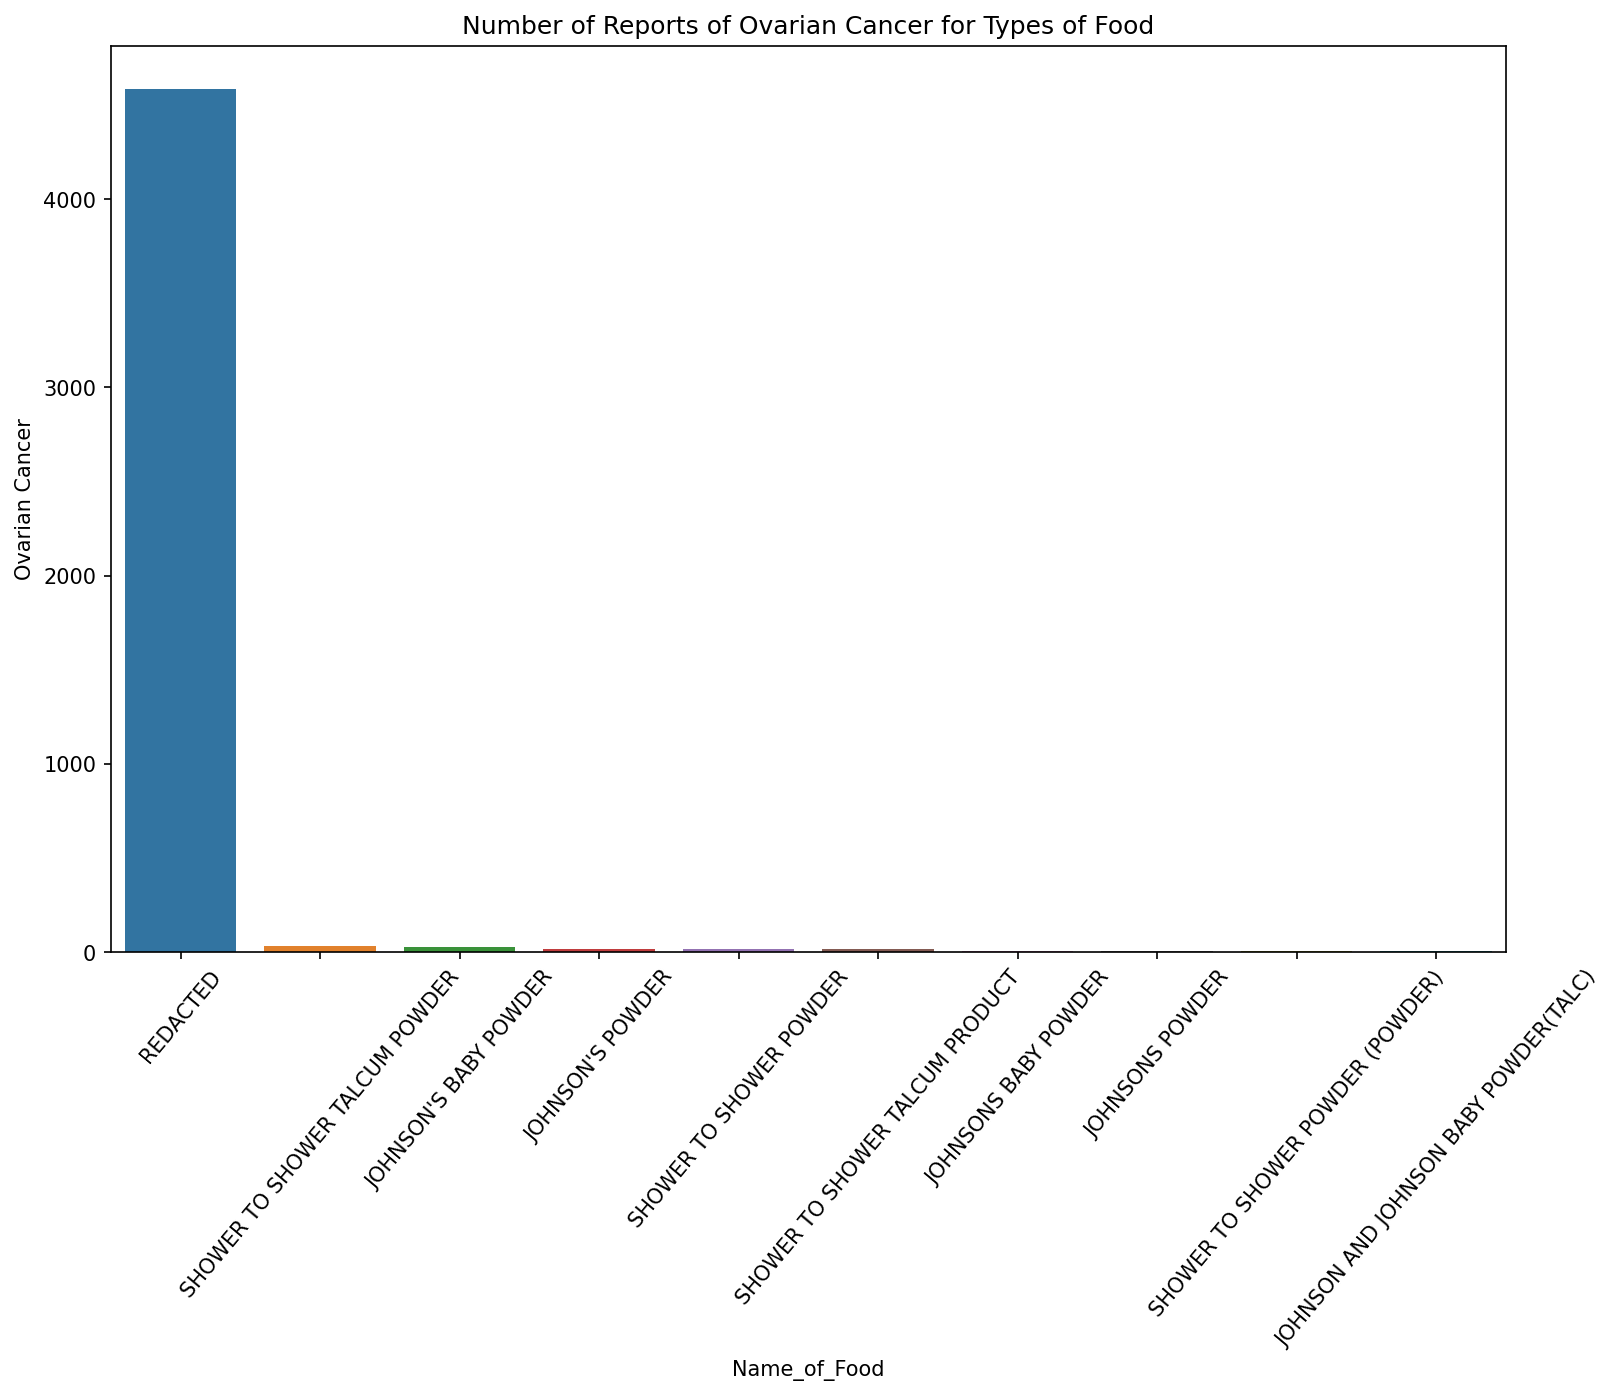

In [83]:
group_cos = t[t['Type_of_Food'] == 'Cosmetics'].groupby('Name_of_Food').sum().reset_index()
plt.figure(figsize = (12, 8), dpi = 150);
sns.barplot(data = group_cos.nlargest(10, 'Ovarian Cancer'), x = 'Name_of_Food', y = 'Ovarian Cancer')
plt.xticks(rotation = 50);
plt.title('Number of Reports of Ovarian Cancer for Types of Food');

Hmm, well that's fairly disappointing. It seems that most Cosmetics are not actually labeled and are instead just put as "REDACTED". This may be because it was found that the product was not the actual cause of the cancer.

Other than the redacted, however, what's interesting is that most of the causes of Ovarian Cancer seem to have been caused by baby or shower powder mainly made from J&J.

In [84]:
t[t['Name_of_Food'] == 'REDACTED']['Type_of_Food'].value_counts().head()

Cosmetics                                 5455
Vit/Min/Prot/Unconv Diet(Human/Animal)     221
Dietary Conv Food/Meal Replacements        158
Baby Food Prod                              62
Fishery/Seafood Prod                        32
Name: Type_of_Food, dtype: int64

It seems that the majority of "REDACTED" foods are for Cosmetic types which makes sense considering it's not suppose to be eaten.

Let's remove the REDACTED and take a look at what Cosmetic foods could be causing cancer.

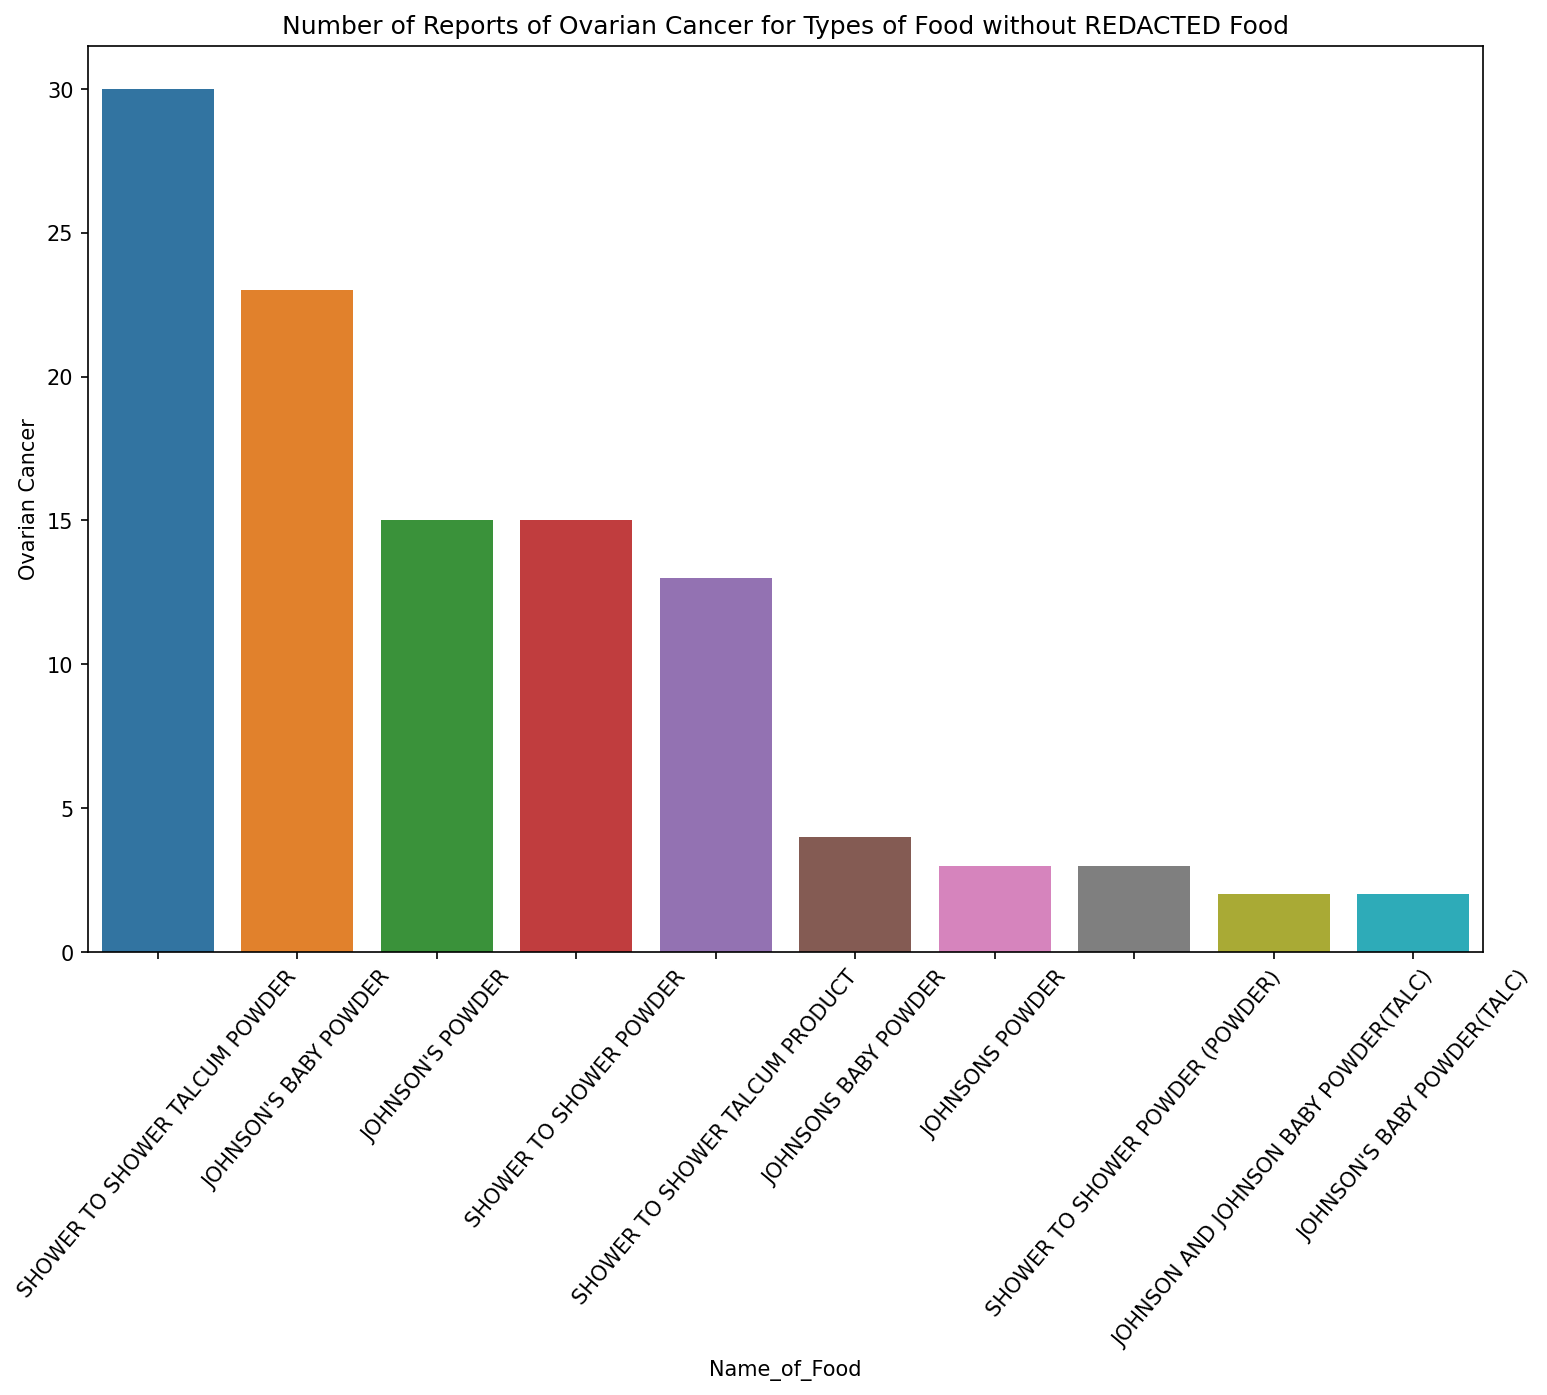

In [85]:
plt.figure(figsize = (12, 8), dpi = 150);
sns.barplot(data = group_cos[group_cos['Name_of_Food'] != 'REDACTED'].nlargest(10, 'Ovarian Cancer'), x = 'Name_of_Food', y = 'Ovarian Cancer')
plt.xticks(rotation = 50);
plt.title('Number of Reports of Ovarian Cancer for Types of Food without REDACTED Food');

Oh wow, it seems that baby powder, espeicially those from Johnson and Johnson, seem to be correlated with Ovarian Cancer. Searching this up, we can actually see that J&J got a lawsuit in September 2022 for their products causing Ovarian Cancer in babies. That's pretty terrifying news but I'm glad something is being done about it.

Let's take one step back now and go back to foods that are causing Ovarian Cancer but are not under Cosmetics.

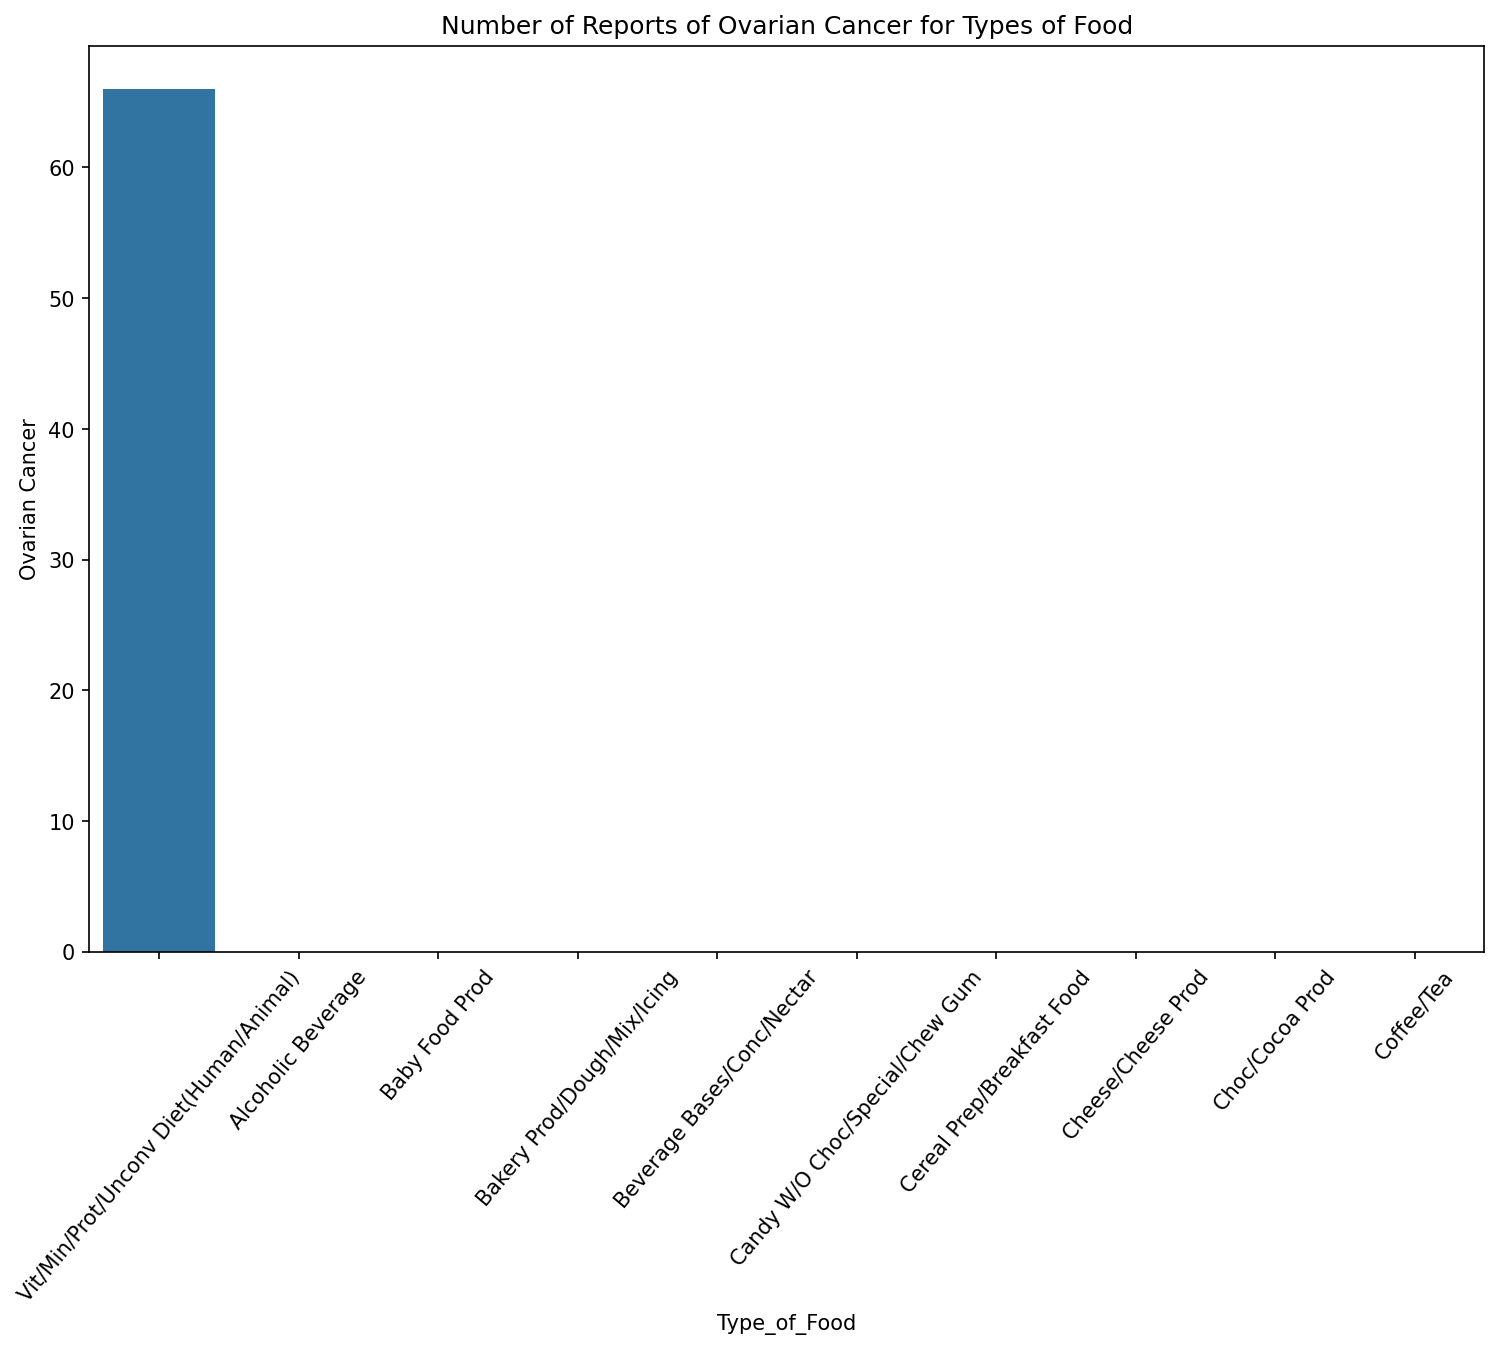

In [86]:
plt.figure(figsize = (12, 8), dpi = 150);
sns.barplot(data = groups[groups['Type_of_Food'] != 'Cosmetics'].nlargest(10 ,'Ovarian Cancer'), x = 'Type_of_Food', y = 'Ovarian Cancer')
plt.xticks(rotation = 50);
plt.title('Number of Reports of Ovarian Cancer for Types of Food');

So really the only other one seems to be the Vit/Min/Unconv Diet. Let's take a look at what specific products may be causing this cancer.

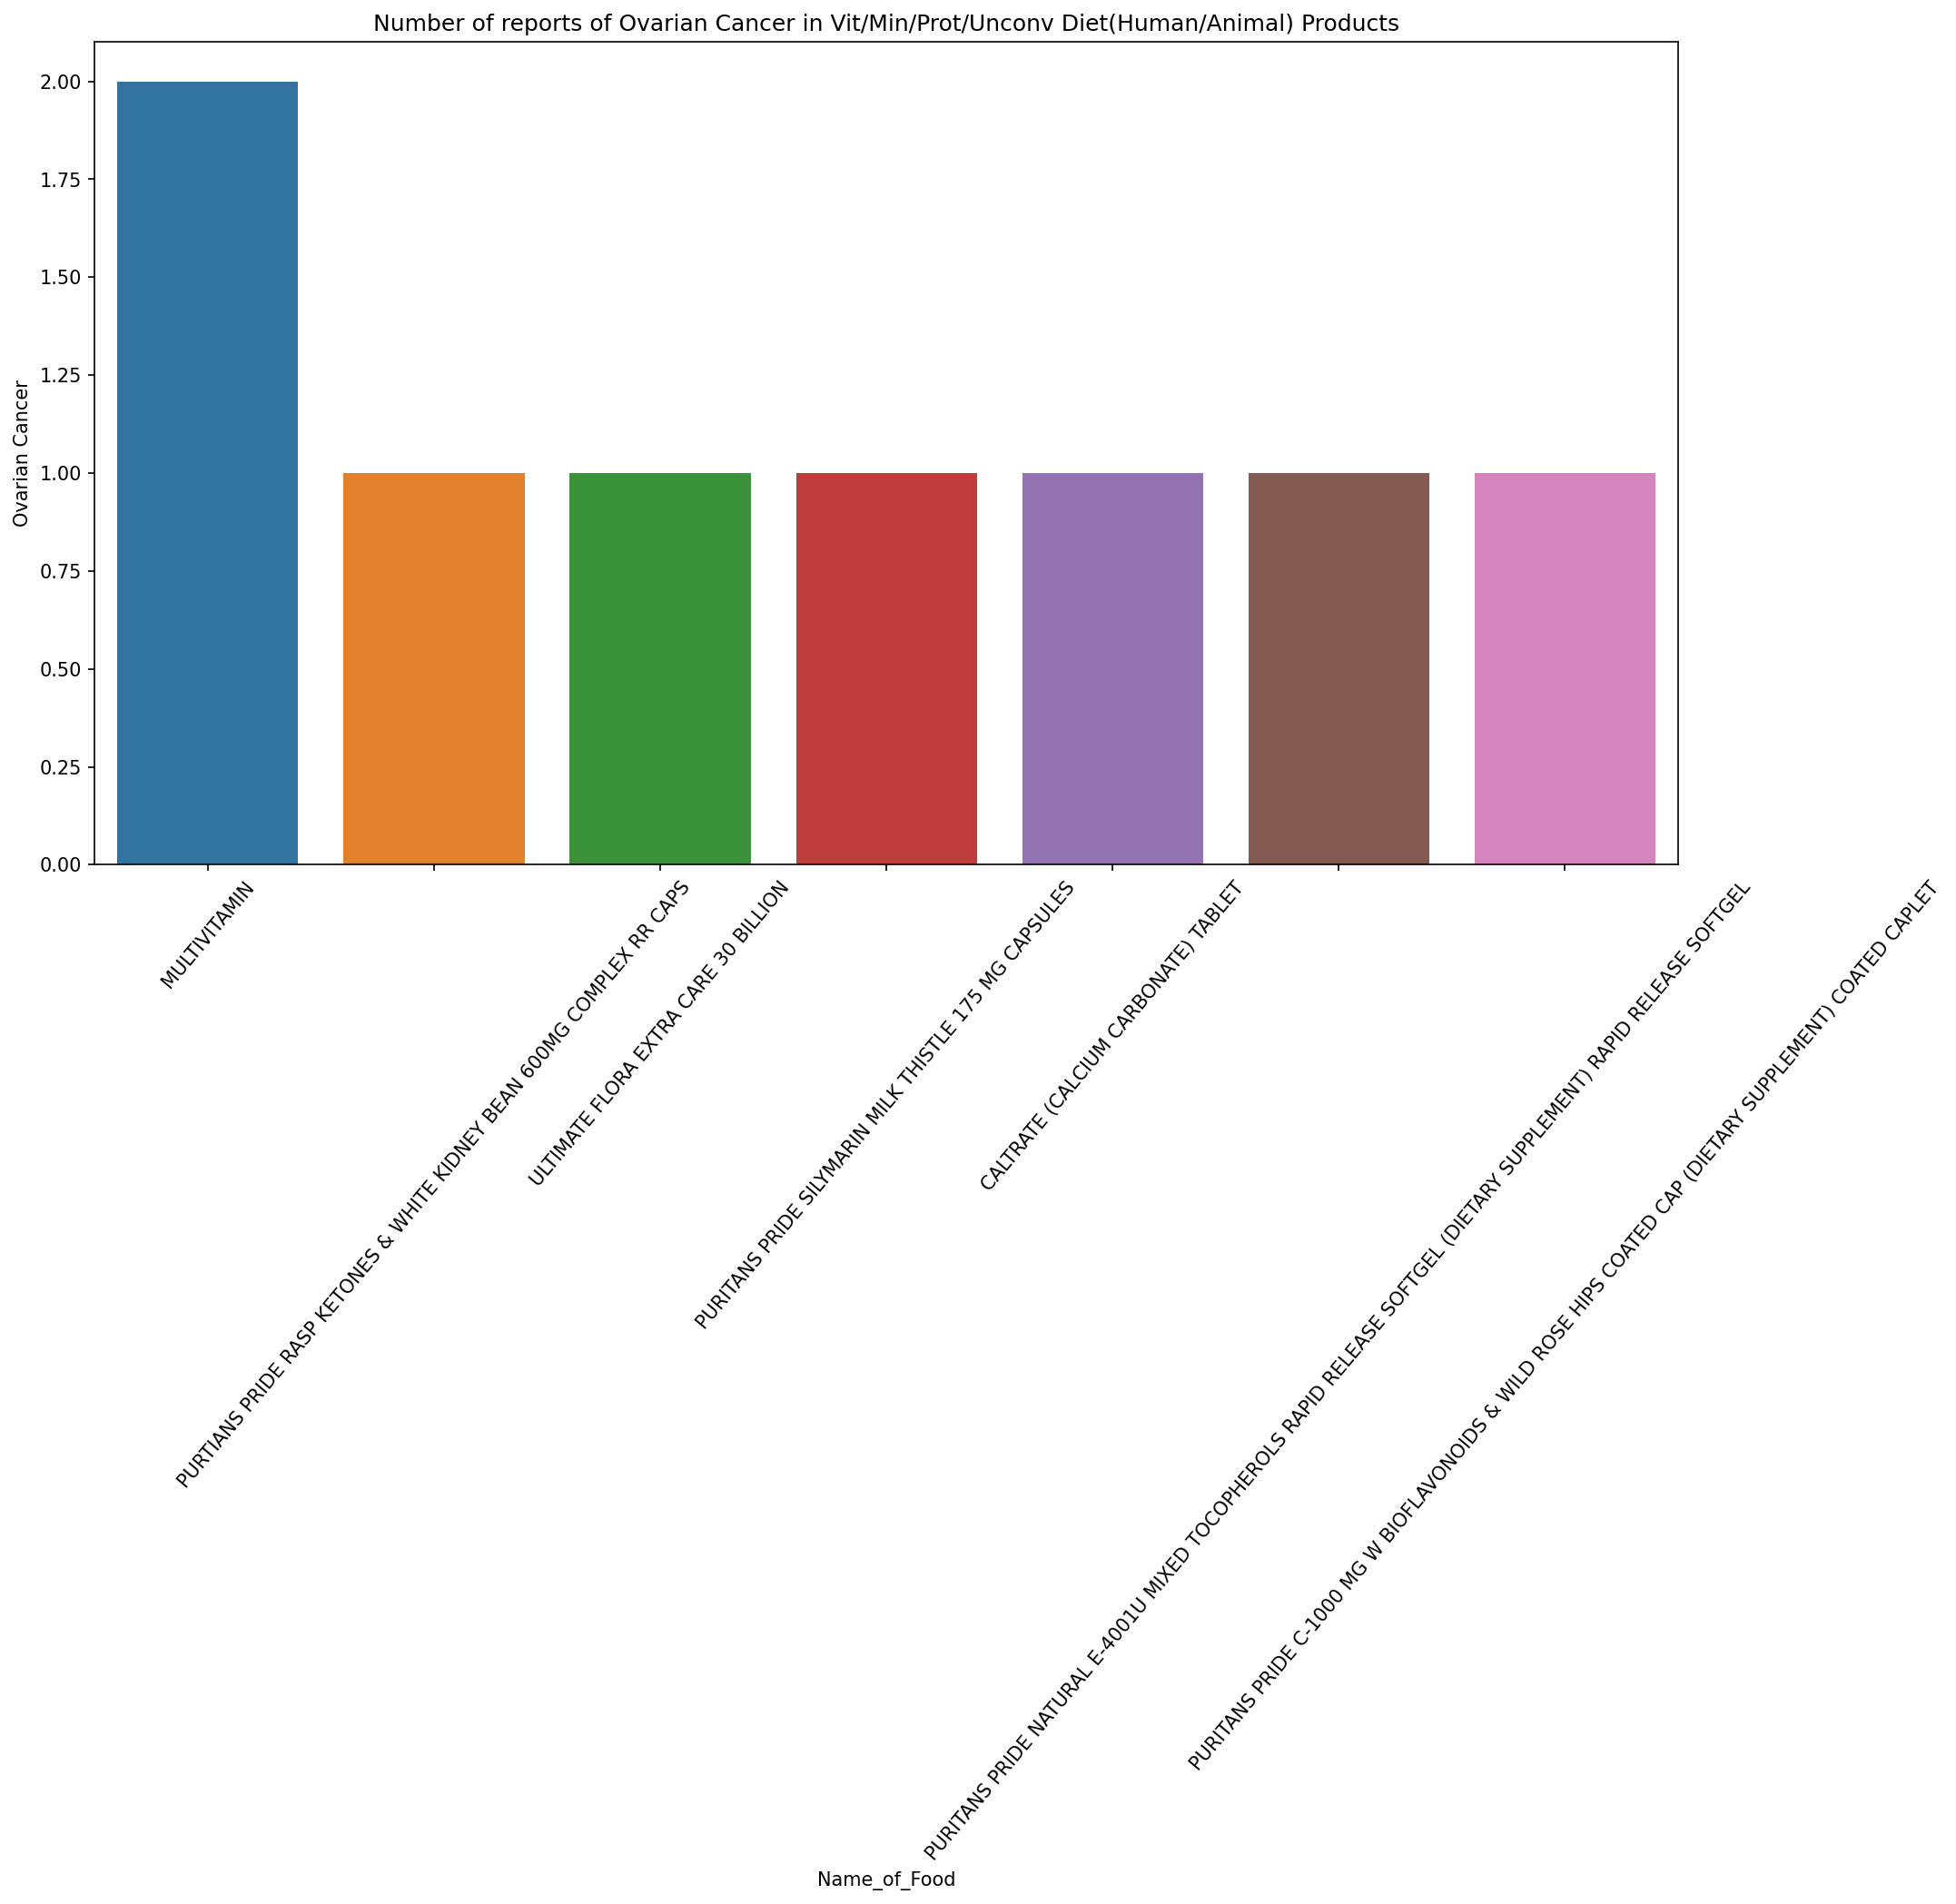

In [87]:
plt.figure(figsize = (15, 8), dpi = 150);

un = t[t['Type_of_Food'] == 'Vit/Min/Prot/Unconv Diet(Human/Animal)'].groupby('Name_of_Food').sum().reset_index()
sns.barplot(data = un.sort_values(by = 'Ovarian Cancer', ascending=False).head(7), x = 'Name_of_Food', y = 'Ovarian Cancer')
plt.xticks(rotation = 50);
plt.title('Number of reports of Ovarian Cancer in Vit/Min/Prot/Unconv Diet(Human/Animal) Products');

In [88]:
un[(un['Name_of_Food'].str.contains('PURITAN')) & (un['Ovarian Cancer'] > 0)].head()

,Name_of_Food,Ovarian Cancer,Alopecia,Dysnopea,Hospital
16791,PURITANS PRIDE ABC PLUS SENIOR MULTI COATED CA...,1,0,0,0
16826,PURITANS PRIDE ALPHA LIPOIC ACID 300 MG RAPID ...,1,0,0,0
16834,PURITANS PRIDE ASTAGALUS 1000MG RAPID RELEASE ...,1,0,0,0
16849,PURITANS PRIDE BEET ROOT EXTRACT 500MG RAPID R...,1,0,0,0
16876,PURITANS PRIDE C-1000 MG W BIOFLAVONOIDS & WIL...,1,0,0,0


In [89]:
un[un['Name_of_Food'].str.contains('PURITAN')]['Ovarian Cancer'].sum()

39

Interesting, so it seems that most of the products that cause Ovarian Cancer come from a product called "Puritans Pride". There are 39 cases from them where Ovarian Cancer resulted from using their product. Searching it up, Puritans Pride is a vitamin/supplement, ironically meant to help decrease chances of getting cancer and increase vitamin intake.

Doing research though, it doesn't seem that anyone is talking about how Puritan's products can cause ovarian cancer, although on the label it says that you should not taken it if you have or had Ovarian Cancer.

Maybe no one is talking about this is because these issues used to happen a while back or because they're spread out throughout the years. Let's check this out.

In [90]:
t[(t['Type_of_Food'] == 'Vit/Min/Prot/Unconv Diet(Human/Animal)') & (t['Ovarian Cancer'] == 1) & (t['Name_of_Food'].str.contains('PURITAN'))]['Date'].value_counts(dropna = False)

NaN    39
Name: Date, dtype: int64

... How helpful. It seems that all the dates weren't kept as records so we have no idea when it happened, this is pretty strange honestly.

Since we've fully explored the causes of Ovarian Cancer, let's now move on to foods and category of foods that cause Dysnopea (difficulty breathing)

First we can take a look at top types of foods that can cause Dysnopea

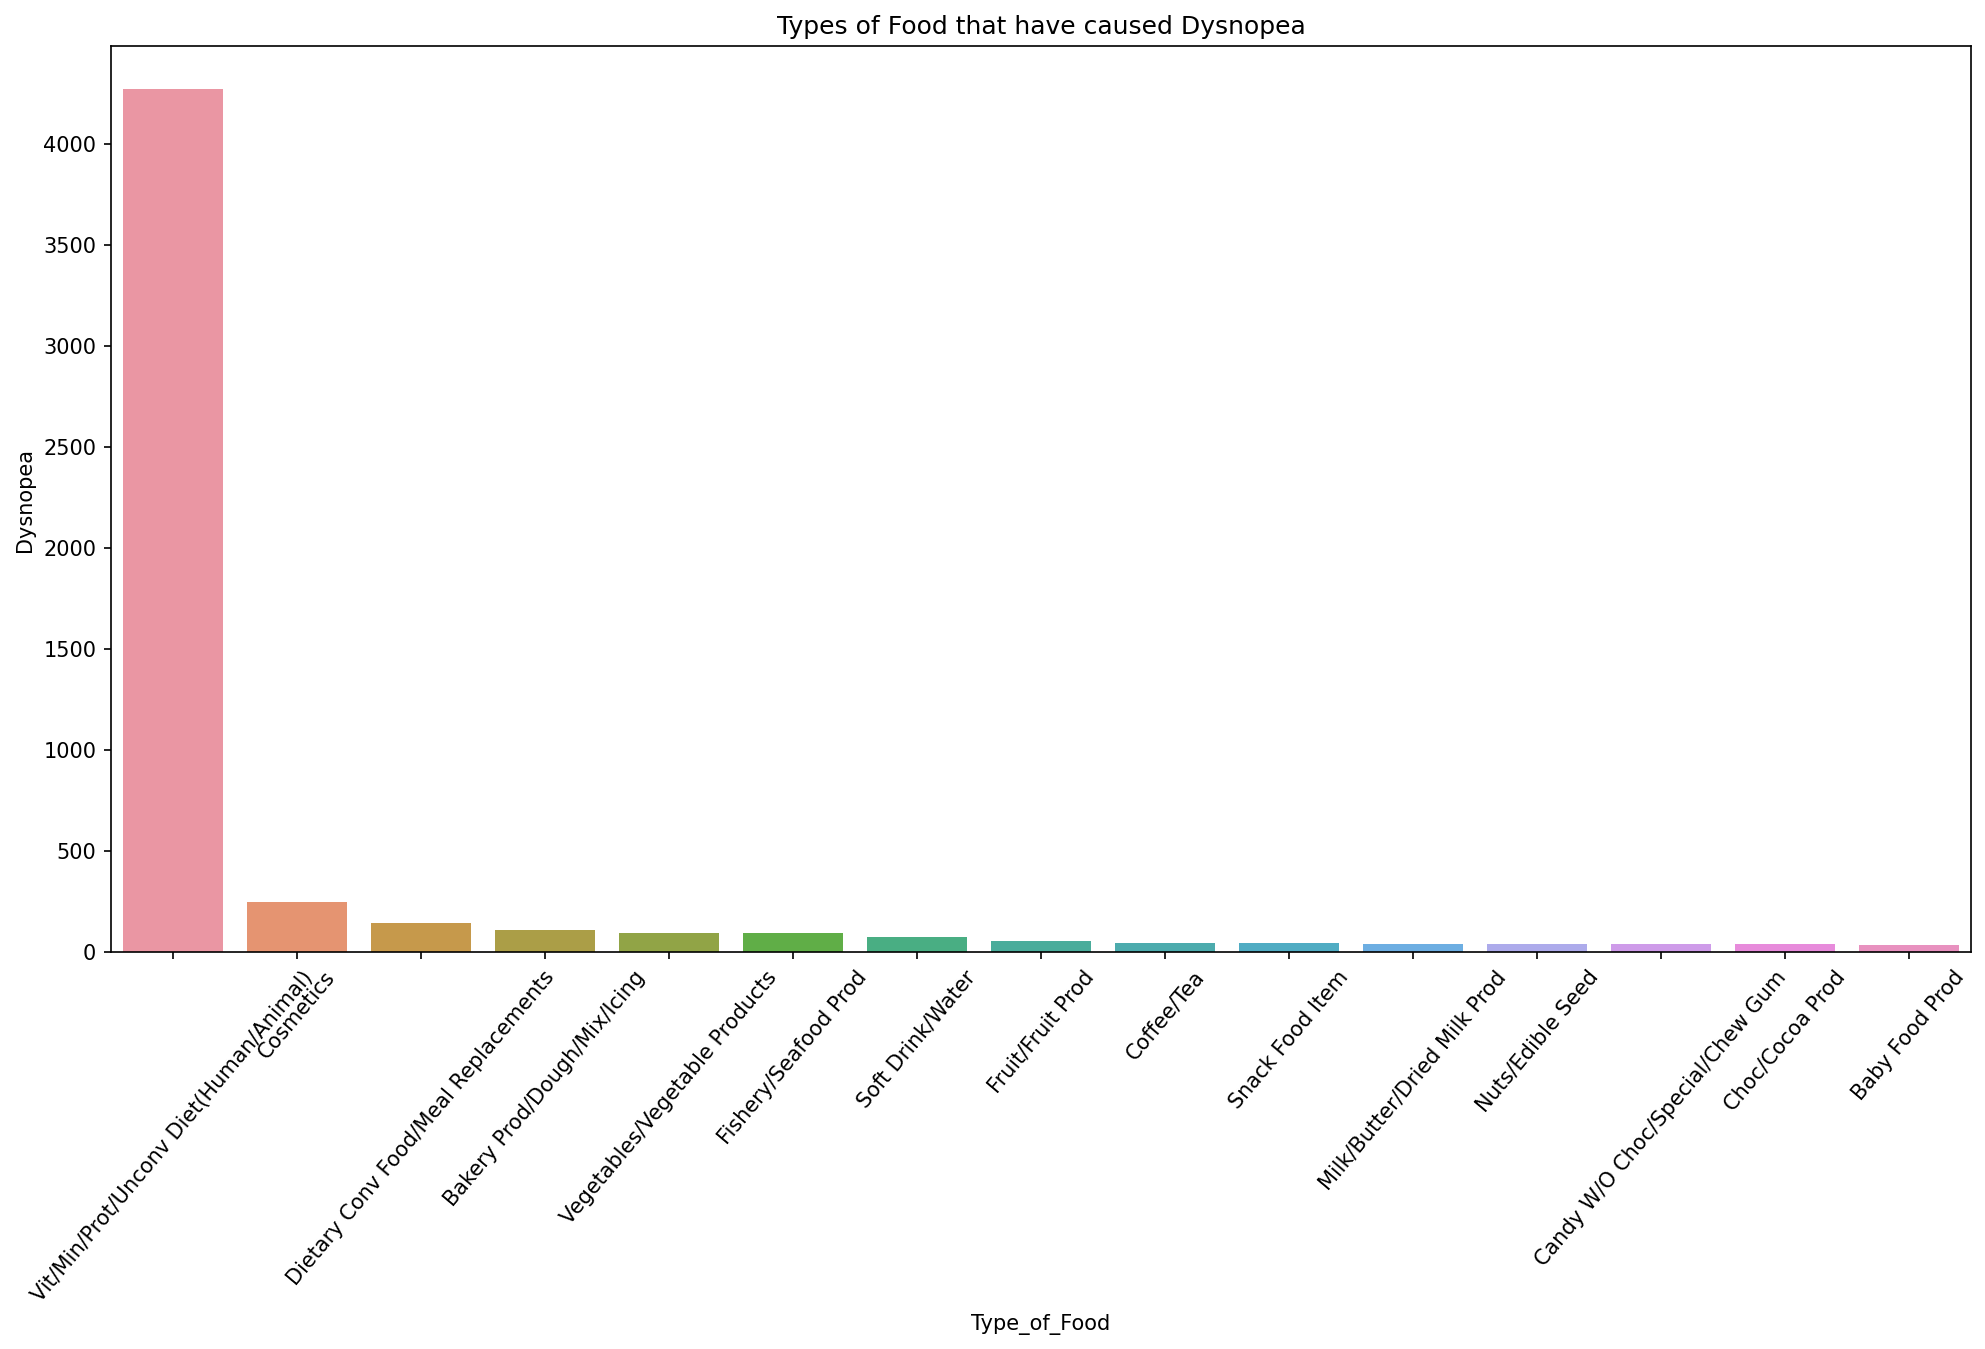

In [91]:
dyst = t.groupby('Type_of_Food').sum().reset_index()
plt.figure(figsize=(16, 8), dpi = 150);
plt.title('Types of Food that have caused Dysnopea');
sns.barplot(data = dyst.nlargest(15, 'Dysnopea'), x = 'Type_of_Food', y = 'Dysnopea')
plt.xticks(rotation = 50);

Okay so in the case of Dysnopea, we can clearly see that Vit/Min/Unconv Diet seems to be the main cause of it. Let's explore the specific types of food that are causing Dysnopea within Vit/Min/Unconv Diet food.

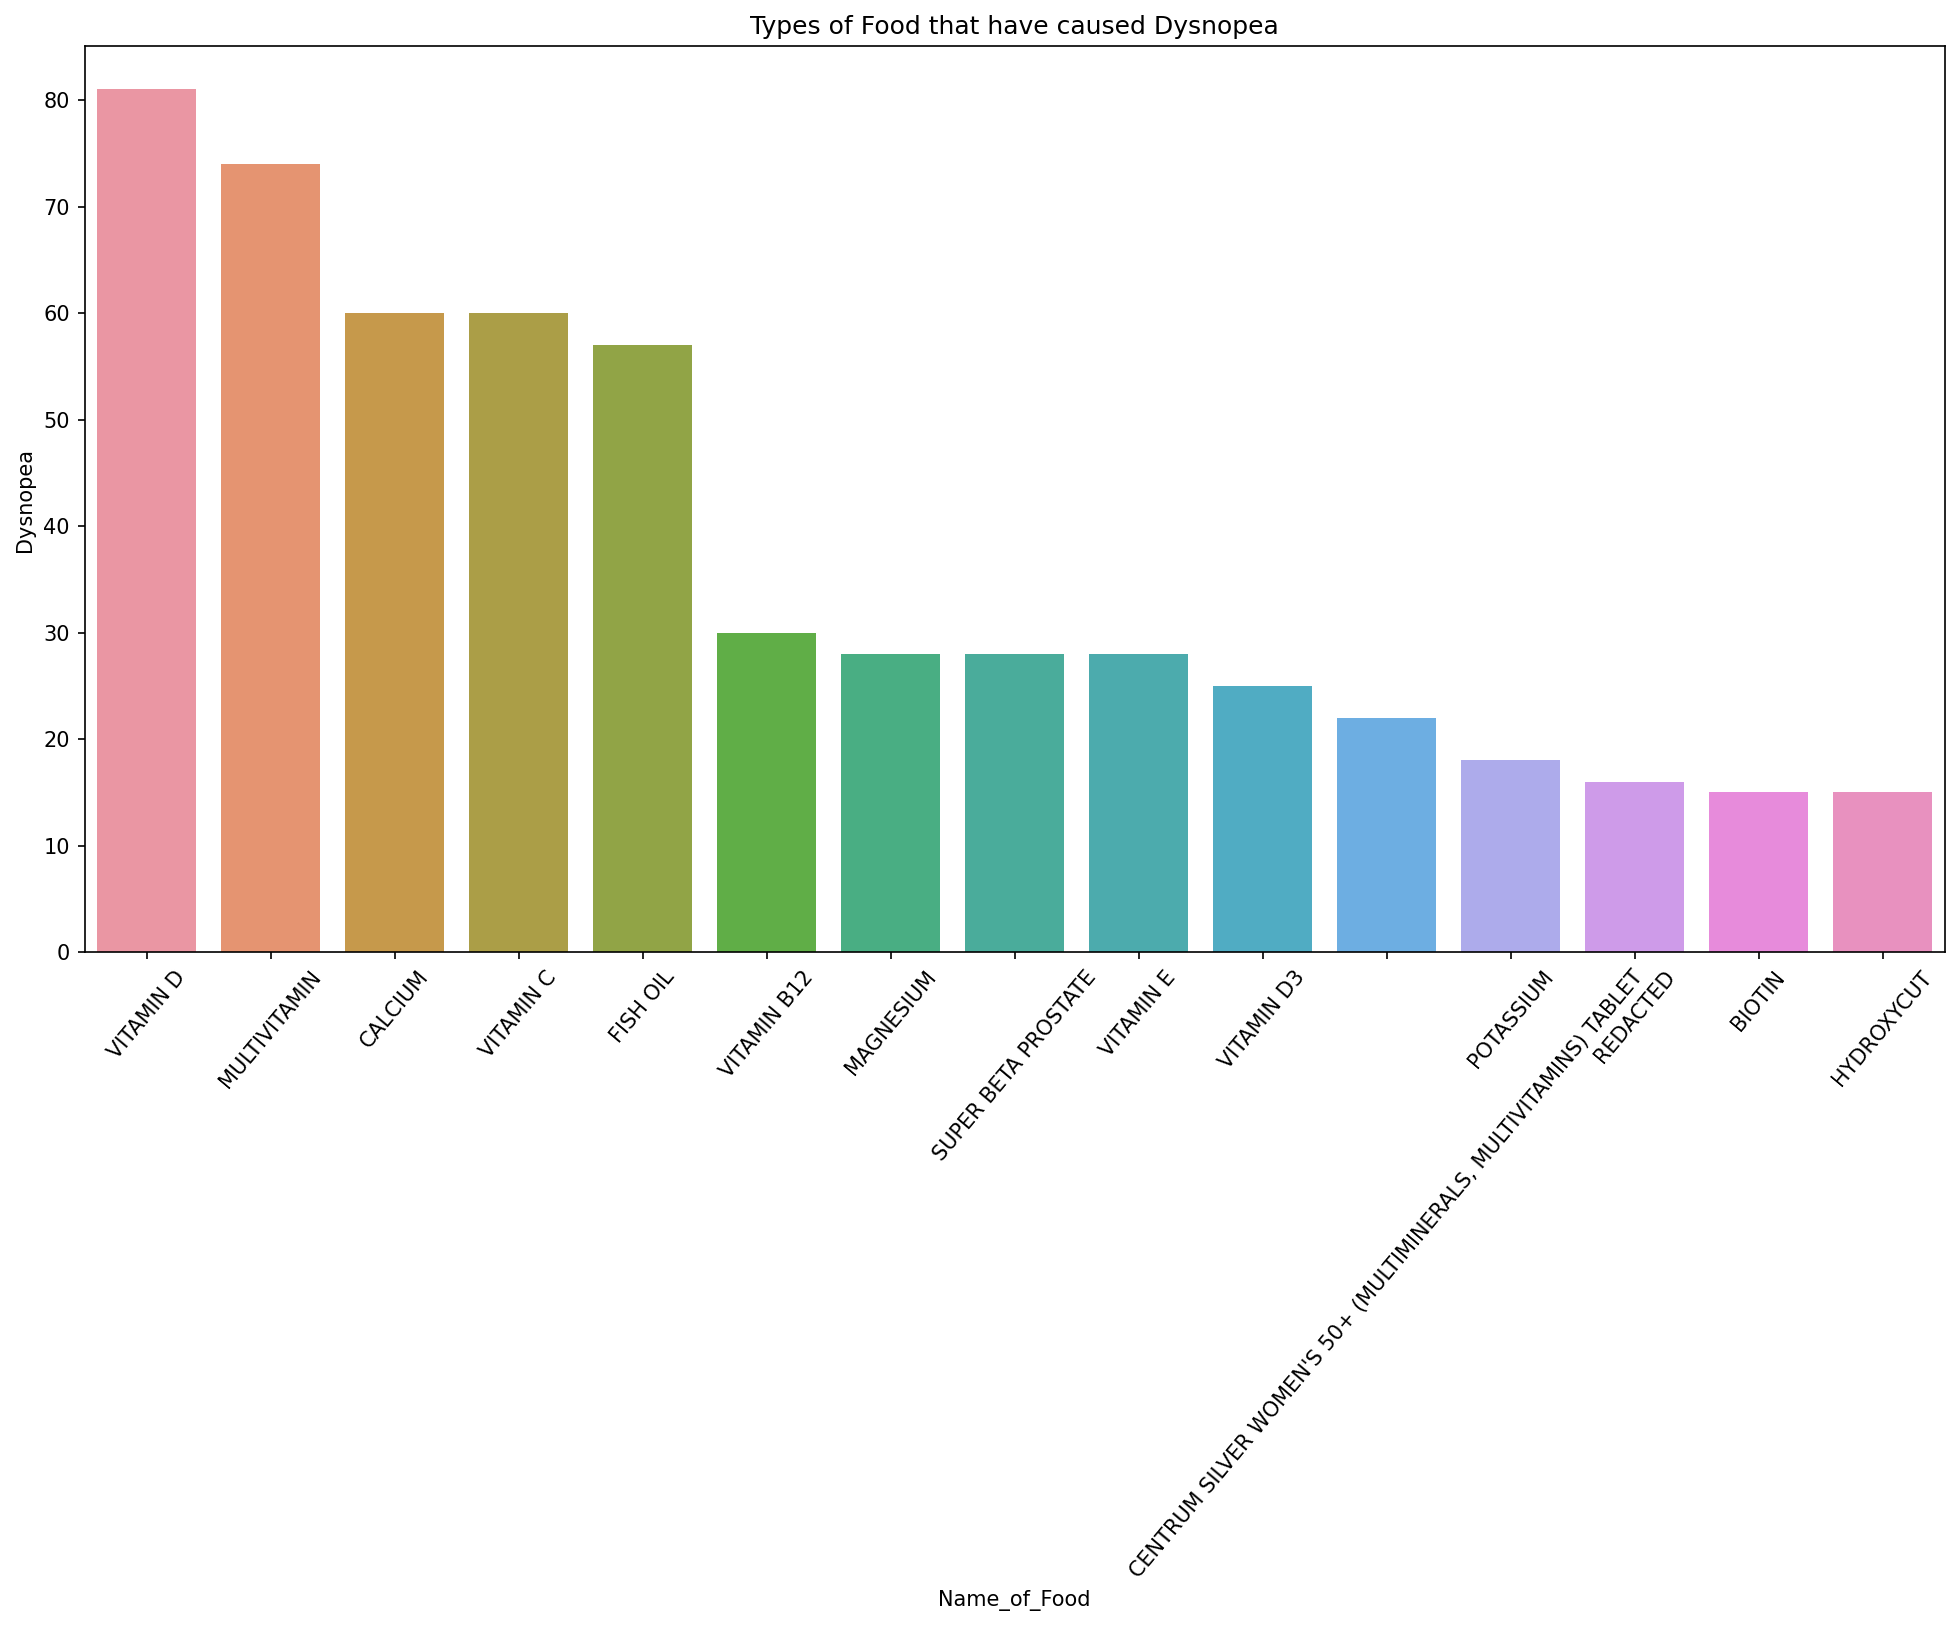

In [92]:
vit = t[t['Type_of_Food'] == 'Vit/Min/Prot/Unconv Diet(Human/Animal)'].groupby('Name_of_Food').sum().reset_index()
plt.figure(figsize=(16, 8), dpi = 150);
plt.title('Types of Food that have caused Dysnopea');
sns.barplot(data = vit.nlargest(15, 'Dysnopea'), x = 'Name_of_Food', y = 'Dysnopea')
plt.xticks(rotation = 50);

Huh, interesting. So it seems that the main types of foods that cause dysnopea are actually just vitamins and nutrients needed in the body. Searching it up, it seems that while vitamins and other nutrients are amazing for you, it can also cause effects like dysnopea if too much of it is taken which makes sense.

Another question I'm kind of curious about is which year had worse amounts of Hospitalizations than others.

In [102]:
dates = pd.DataFrame(df[['Name_of_Food','Type_of_Food', 'Symptoms', 'Date']]).dropna(subset = ['Name_of_Food','Type_of_Food', 'Symptoms'])
dates['Hospitalalized'] = np.vectorize(unexpected)(dates['Symptoms'], 'HOSPITALISATION')
dates.head()

,Name_of_Food,Type_of_Food,Symptoms,Date,Hospitalalized
0,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,"SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",8/4/2003,1
1,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,"SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...",8/4/2003,1
2,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,Ice Cream Prod,"NAUSEA, DYSGEUSIA, DIARRHOEA",NaN,0
3,ENFAMIL LIPIL BABY FORMULA,Baby Food Prod,"GASTROINTESTINAL DISORDER, VOMITING",11/24/2003,0
4,ENFIMIL LIPIL BABY FORMULA,Baby Food Prod,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION",NaN,0


In [103]:
dates['Date'].value_counts(dropna=False) 

NaN          37130
5/6/2012       128
6/10/2015      102
1/1/2015        94
2/28/2015       86
             ...  
4/12/2005        1
3/31/2005        1
5/12/2005        1
4/24/2005        1
1/6/2003         1
Name: Date, Length: 5174, dtype: int64

Hmm it seems that a majority of the dates are not filled out which will most likely affect the data a lot but I will still try and graph it to get a good idea of the dates that food disease was likely to occur.

In [126]:
dates['Year'] = dates['Date'].astype(str).apply(lambda x: x.split('/')[-1])
dates = dates.sort_values(by = ['Year']).dropna()
dates.head()

,Name_of_Food,Type_of_Food,Symptoms,Date,Hospitalalized,Year
26489,SLOW-MAG GASTRO-RESISTANT TABLET,Vit/Min/Prot/Unconv Diet(Human/Animal),"PAIN, HYPOAESTHESIA",6/19/1931,0,1931
72030,GARDEN OF LIFE RAW PROTEIN POWDER,Vit/Min/Prot/Unconv Diet(Human/Animal),DIARRHOEA,1/2/1950,0,1950
54728,EQUATE VITAMINS,Vit/Min/Prot/Unconv Diet(Human/Animal),"DEFORMITY, ABDOMINAL DISTENSION",1/1/1950,0,1950
54555,PET MILK COMPANY PET EVAPORATED MILK,Milk/Butter/Dried Milk Prod,HERNIA,5/1/1950,0,1950
54729,PET MILK COMPANY PET EVAPORATED MILK,Milk/Butter/Dried Milk Prod,"DEFORMITY, ABDOMINAL DISTENSION",1/1/1950,0,1950


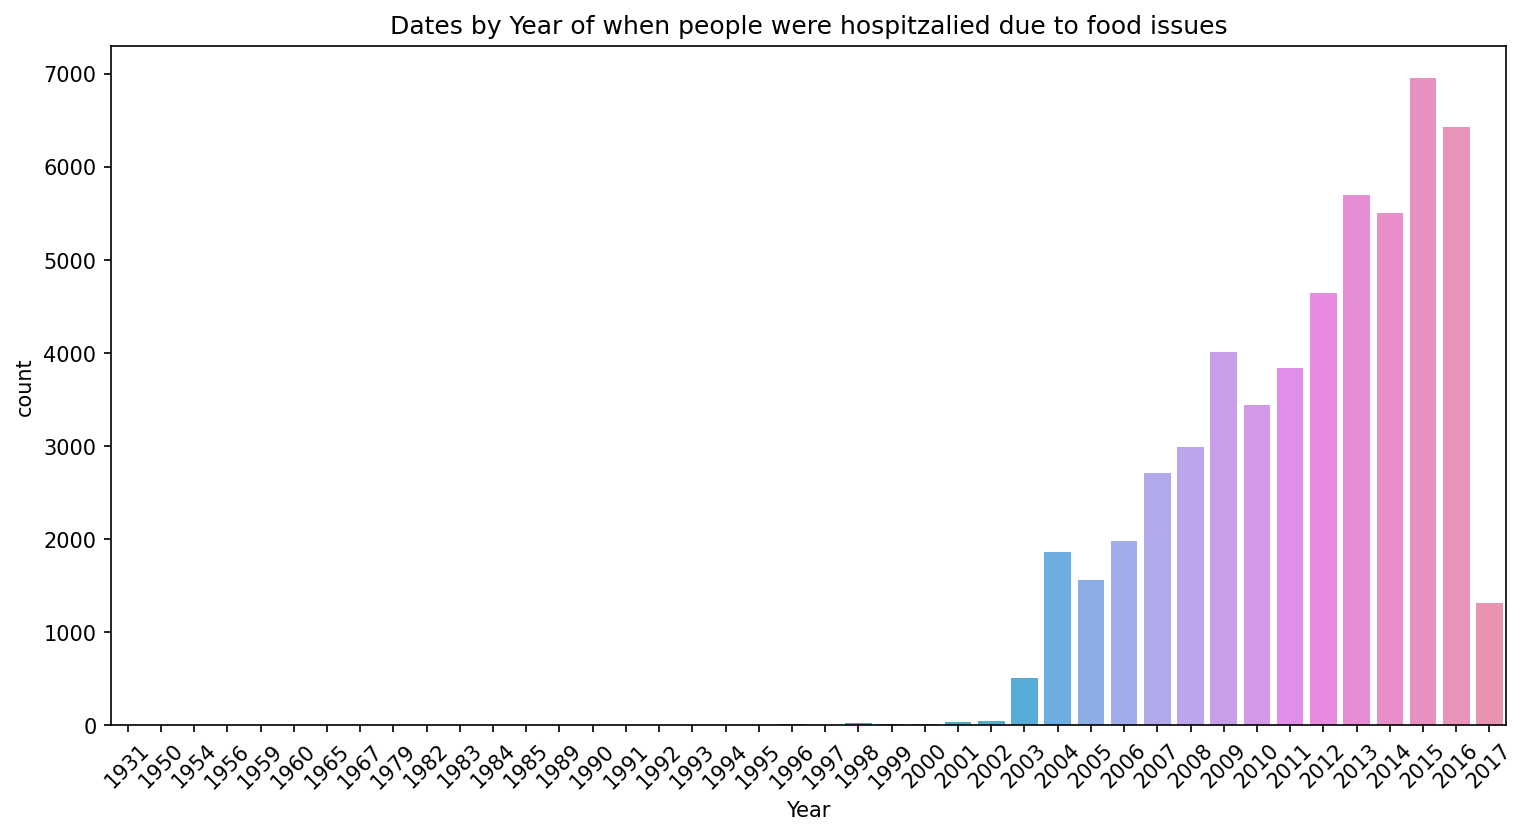

In [127]:
plt.figure(figsize = (12, 6), dpi = 150);
plt.title('Dates by Year of when people were hospitzalied due to food issues');
sns.countplot(data = dates, x = 'Year')
plt.xticks(rotation = 45);

So as expected, the later years have significantly more data because as time goes on, our data collecting methods improved massively and we actually started keeping track of the year even though food disease was most likely significantly worse back then. I find it interesting though how there was just mainly an upwards trend in food disease until 2017. However, I have a feeling this is because the year was not recorded and there is not enough data, not because something happened. I cannot find something, but maybe there is.

In [129]:
df['Symptoms'].head()

0    SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...
1    SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...
2                         NAUSEA, DYSGEUSIA, DIARRHOEA
3                  GASTROINTESTINAL DISORDER, VOMITING
4      GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION
Name: Symptoms, dtype: object

Lastly, I want to test out the types of food and names of food that cause death in people.

In [130]:
deaths = pd.DataFrame(df[['Name_of_Food','Type_of_Food', 'Symptoms', 'Date']]).dropna(subset = ['Symptoms'])
deaths['Death'] = np.vectorize(unexpected)(dates['Symptoms'], 'DEATH')
deaths.head()

,Name_of_Food,Type_of_Food,Symptoms,Date,Death
0,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,"SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",8/4/2003,0
1,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,"SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...",8/4/2003,0
2,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,Ice Cream Prod,"NAUSEA, DYSGEUSIA, DIARRHOEA",NaN,0
3,ENFAMIL LIPIL BABY FORMULA,Baby Food Prod,"GASTROINTESTINAL DISORDER, VOMITING",11/24/2003,0
4,ENFIMIL LIPIL BABY FORMULA,Baby Food Prod,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION",NaN,0


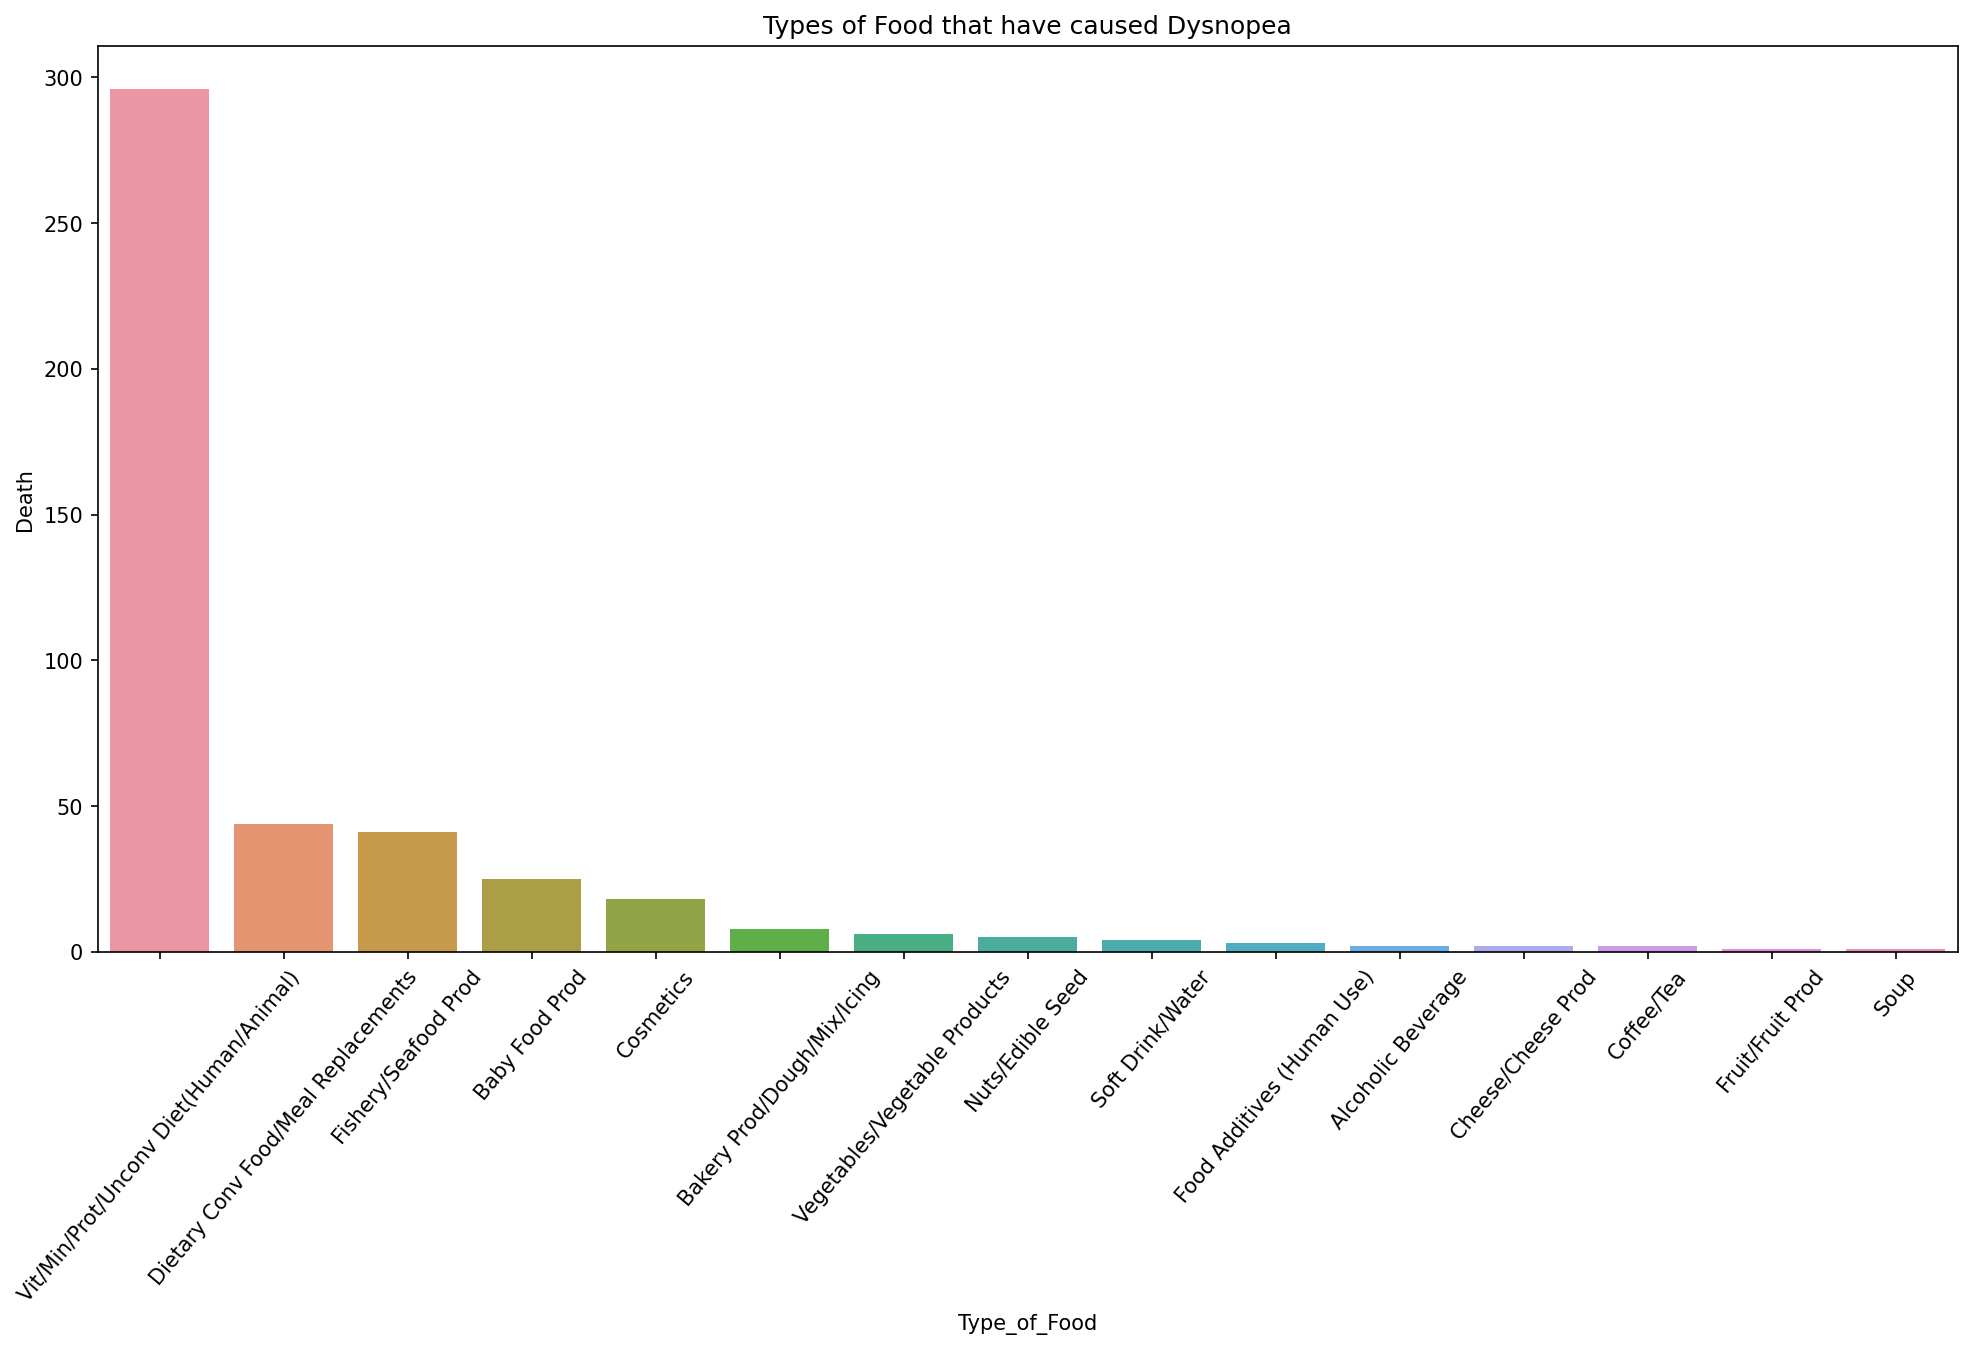

In [134]:
plt.figure(figsize=(16, 8), dpi = 150);
plt.title('Types of Food that have caused Dysnopea');
sns.barplot(data = deaths.groupby('Type_of_Food').sum().reset_index().nlargest(15, 'Death'), x = 'Type_of_Food', y = 'Death')
plt.xticks(rotation = 50);

So once again, it seems that Vitamins/Minerals/etc. are the cause of the most deaths. Let's look a bit more into what specific foods are causing these deaths but not grouped by the type this time.

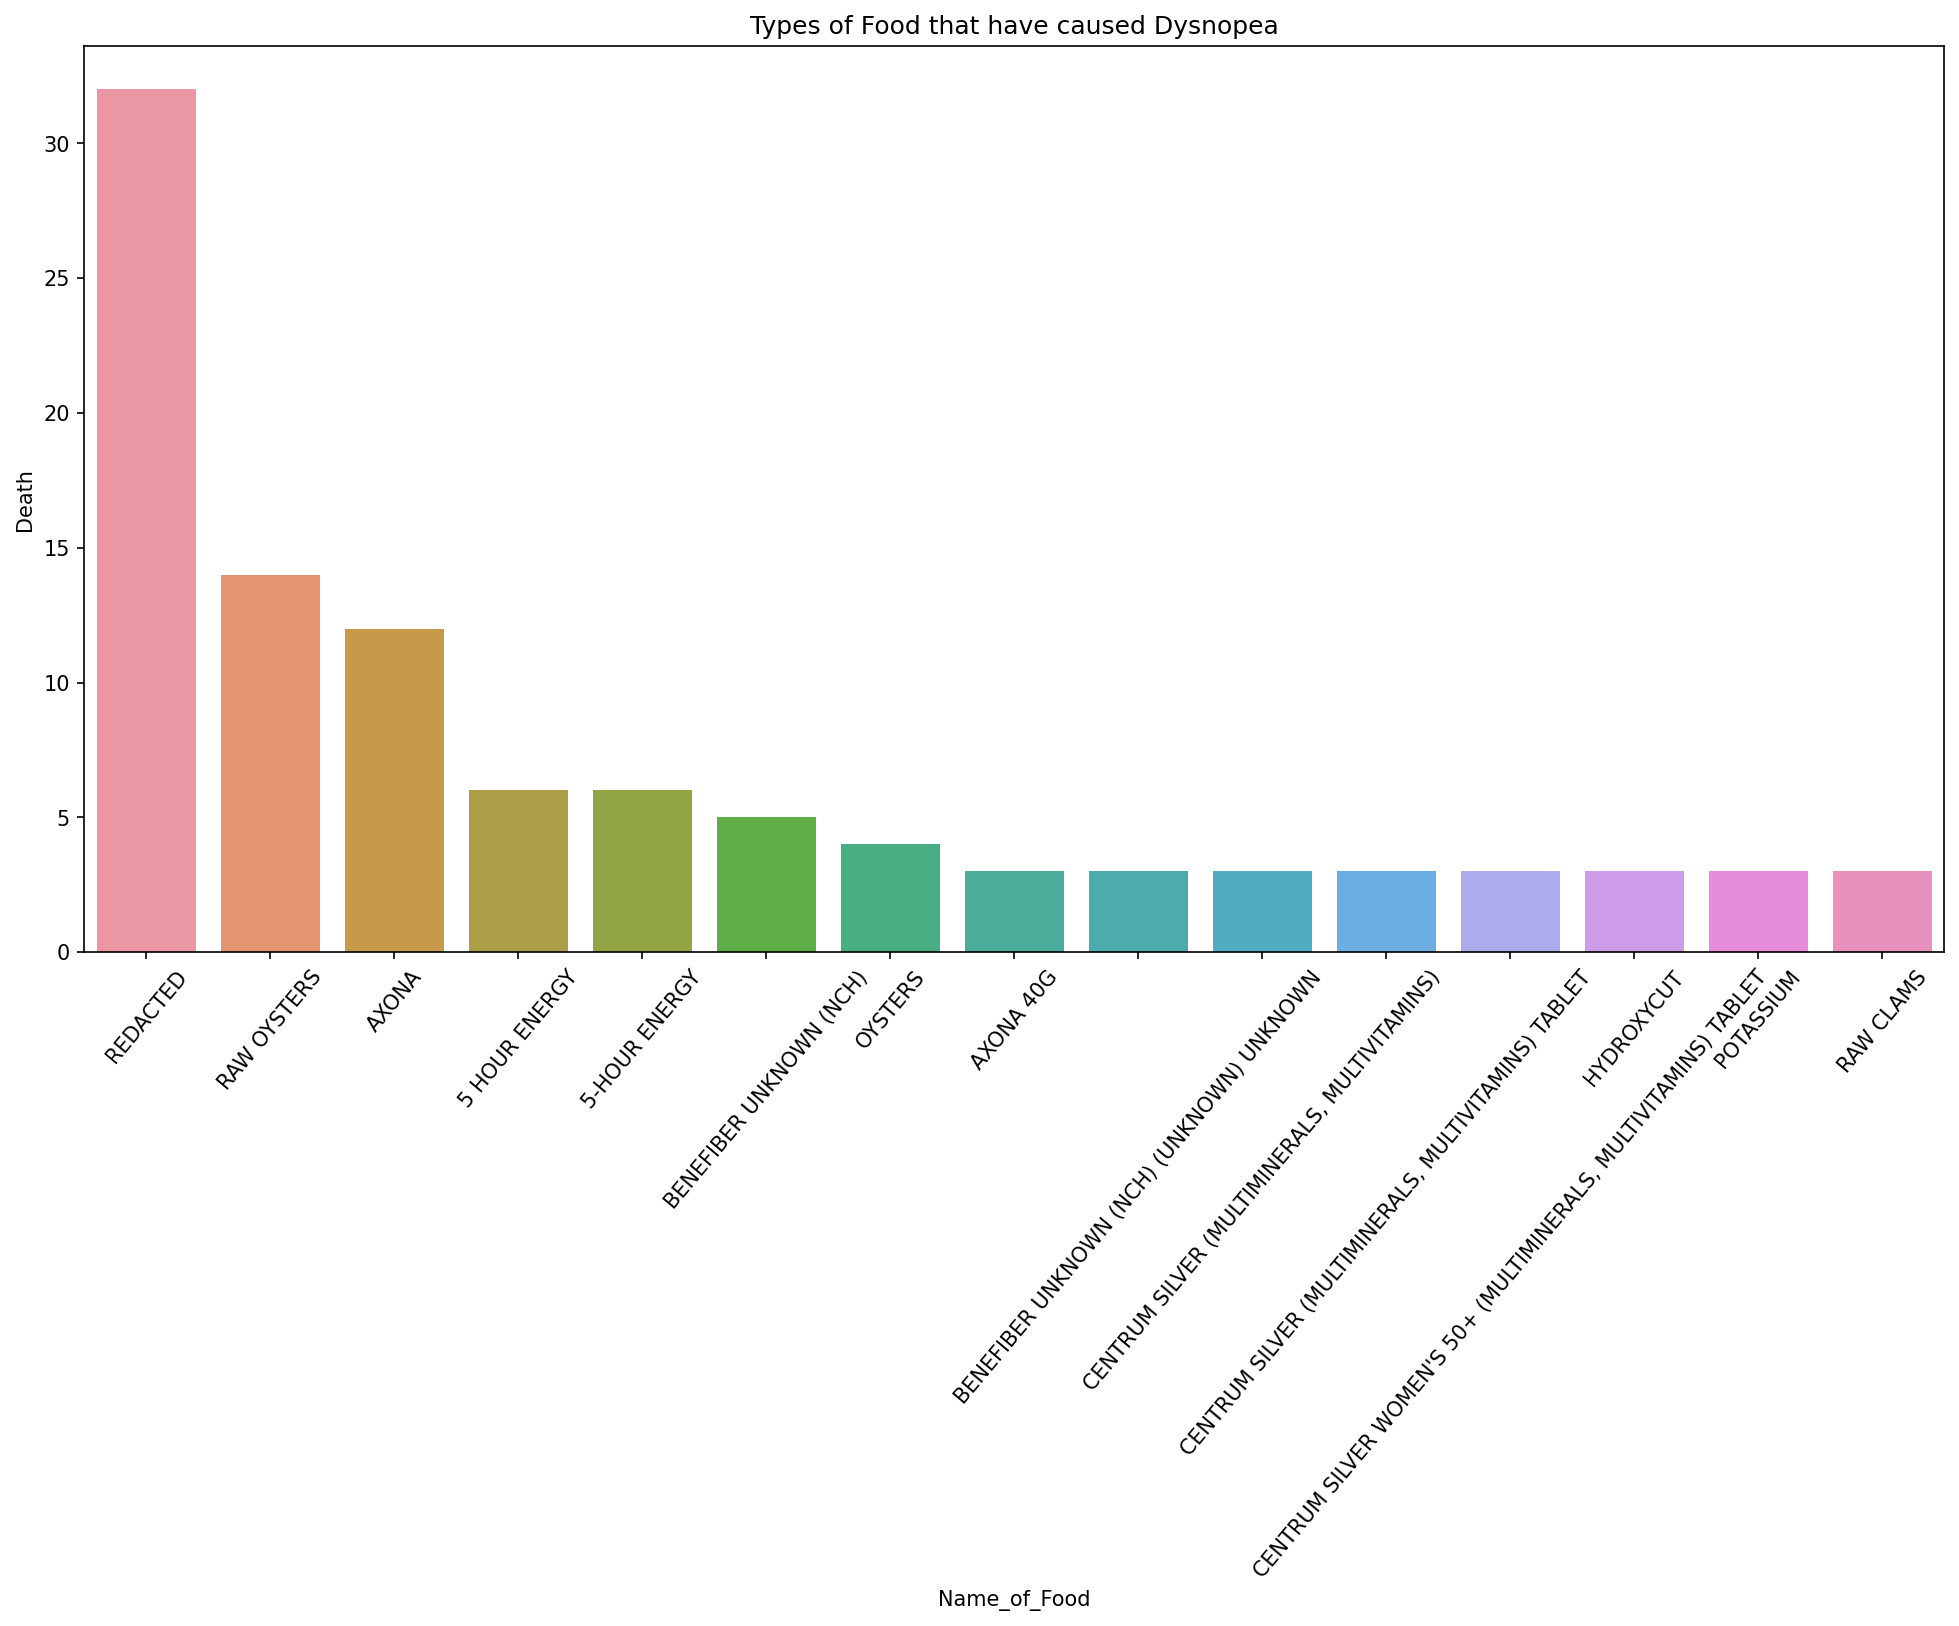

In [137]:
plt.figure(figsize=(16, 8), dpi = 150);
plt.title('Types of Food that have caused Dysnopea');
sns.barplot(data = deaths.groupby('Name_of_Food').sum().reset_index().nlargest(15, 'Death'), x = 'Name_of_Food', y = 'Death')
plt.xticks(rotation = 50);

So most foods are not shown here which is no surprise but there are others including Raw Oysters, Axona, and 5 hour energy.

Searching it up Raw Oysters can cause diseases, one of the main ones being vibro vulnificus which can cause skin lesions and dangerously low blood pressure. Eating Raw Oysters is a huge no and so most likely it was caused by people undercooking the and not getting all the bacteria out.

Axona is a perscription medicine made for people suffering with low to medium Alzheimer's disease symptoms. At least, that's what it says it'll do. In reality, the drug is not approved by the Food and Drug's Administration and is not considered a drug that should be used for Alzheimer's. 

5 Hour Energy is an interesting one. It is relatively safe but having more than 2 doses a day can be very dangerous to one's health. It's high caffeine amounts can cause jitteriness, heart palpitations, and in the worst case, death. 

I think that's pretty much it for this notebook. I hope you enjoyed!